# Objective

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car,
    horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in
    machine learning. So if you want to learn how to train a car price prediction model then this project is for you.



In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Import

In [2]:
new = pd.read_csv(r"C:\Users\DELL\Desktop\Machine Learning\oasis\CarPrice_Assignment.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Type 

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Univariate Analysis

In [4]:
# Let's look at some statistical information about our dataframe.
new.describe() 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# EDA
 

<AxesSubplot:>

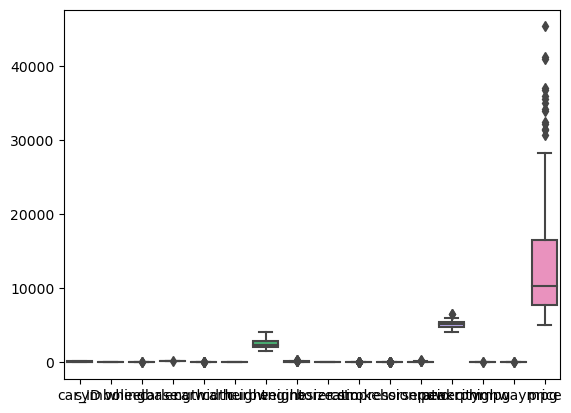

In [5]:
sns.boxplot(data=new)

#### Missing Value

In [6]:
new.isna().sum()  # no missing data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [7]:
new.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# Putting feature variable to X
X = new.drop('price', axis= 1)

# Putting response variable to y
y = new[['price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=122)

In [9]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,price,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
54,7395.0,55,1,mazda glc deluxe,gas,std,four,sedan,fwd,front,...,four,91,2bbl,3.08,3.150,9.0,68,5000,31,38
101,13499.0,102,0,nissan dayz,gas,std,four,sedan,fwd,front,...,six,181,mpfi,3.43,3.270,9.0,152,5200,17,22
55,10945.0,56,3,mazda 626,gas,std,two,hatchback,rwd,front,...,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23
196,15985.0,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.150,9.5,114,5400,24,28
33,6529.0,34,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,...,four,92,1bbl,2.91,3.410,9.2,76,6000,30,34


# Correlation Matrix

In [10]:
df.corr()

,price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.000000,-0.153771,-0.139935,0.613245,0.715502,0.745243,0.180325,0.829469,0.868656,0.543718,0.147014,0.089175,0.829910,-0.084025,-0.700002,-0.706242
car_ID,-0.153771,1.000000,-0.220725,0.102809,0.150303,-0.009362,0.324254,0.033745,-0.073143,0.242582,-0.202364,0.127817,-0.072367,-0.200892,0.082130,0.072521
symboling,-0.139935,-0.220725,1.000000,-0.550803,-0.405842,-0.364459,-0.526499,-0.325796,-0.209123,-0.229919,-0.030840,-0.184011,0.004838,0.351766,-0.008369,0.072734
wheelbase,0.613245,0.102809,-0.550803,1.000000,0.884143,0.875133,0.567191,0.821112,0.624674,0.509993,0.310448,0.342081,0.389997,-0.439316,-0.433528,-0.524825
carlength,0.715502,0.150303,-0.405842,0.884143,1.000000,0.889335,0.520395,0.901312,0.724875,0.620977,0.227923,0.217214,0.605249,-0.333541,-0.635241,-0.679802
carwidth,0.745243,-0.009362,-0.364459,0.875133,0.889335,1.000000,0.373772,0.867466,0.731863,0.523070,0.309531,0.261665,0.594282,-0.261234,-0.601551,-0.664051
carheight,0.180325,0.324254,-0.526499,0.567191,0.520395,0.373772,1.000000,0.365201,0.136761,0.206329,-0.010100,0.349612,-0.055803,-0.406378,-0.012652,-0.085790
curbweight,0.829469,0.033745,-0.325796,0.821112,0.901312,0.867466,0.365201,1.000000,0.852271,0.639216,0.282410,0.214789,0.744808,-0.297339,-0.715542,-0.764639
enginesize,0.868656,-0.073143,-0.209123,0.624674,0.724875,0.731863,0.136761,0.852271,1.000000,0.585105,0.238362,0.065928,0.821829,-0.251521,-0.639835,-0.661957
boreratio,0.543718,0.242582,-0.229919,0.509993,0.620977,0.523070,0.206329,0.639216,0.585105,1.000000,0.006997,0.051477,0.554785,-0.276567,-0.544852,-0.563853


<AxesSubplot:>

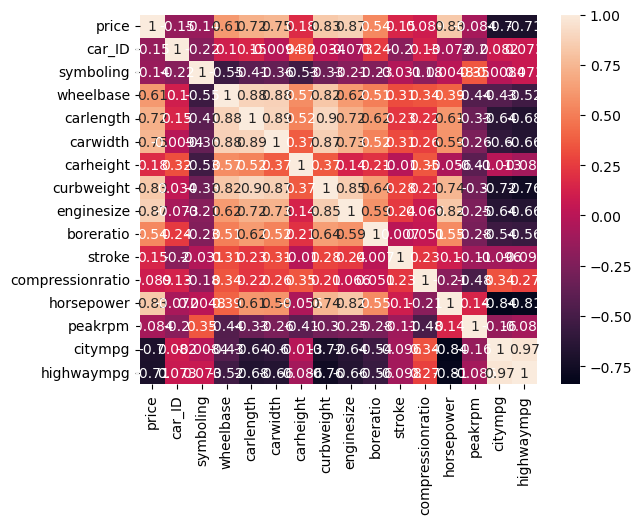

In [11]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Income vs Experience'}, xlabel='enginesize', ylabel='price'>

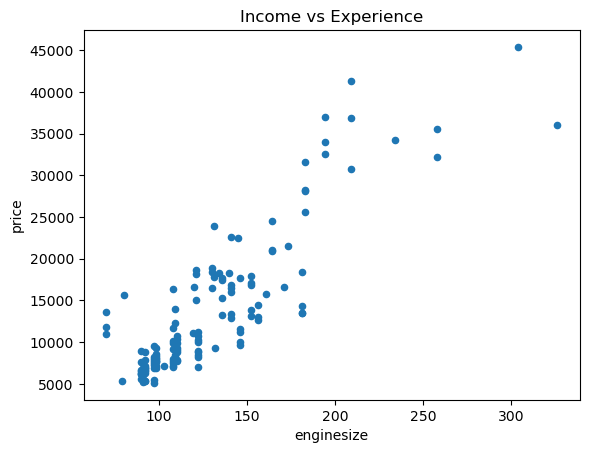

In [12]:
df.plot.scatter(x='enginesize', y='price', title='Income vs Experience')

In [13]:
# Qualitative Variable
Quantitative_Variable = new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


In [14]:
Qualitative_Variable = new[new.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [15]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5


In [16]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Model Building

*  H0 :- There is no Linear relationship between X and Y

* Vs 

*  H1 :- There is a Linear relationship between X and Y

Alpha = 0.05 (5%)

In [17]:
new.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ symboling + CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg',data=Final_combined).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     67.33
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           3.44e-76
Time:                        20:29:14   Log-Likelihood:                -1901.1
No. Observations:                 205   AIC:                             3850.
Df Residuals:                     181   BIC:                             3930.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.583e+04    1.5e+04     -3.054      0.003   -7.54e+04   -1.62e+04
symboling          164.6800    255.688      0.644      0.520    -339.832     669.192
CarName            -33.1841      5.806     -5.716      0.000     -44.639     -21.729
fueltype          3088.0762   6525.859      0.473      0.637   -9788.468     1.6e+04
aspiration         535.3198    907.189      0.590      0.556   -1254.707    2325.346
doornumber        -867.3042    650.965     -1.332      0.184   -2151.761     417.153
carbody          -1023.9125    371.283     -2.758      0.006   -1756.513    -291.312
drivewheel         778.4908    548.095      1.420      0.157    -302.987    1859.969
enginelocation    1.032e+04   2086.385      4.945      0.000    6200.696    1.44e+04
wheelbase          227.7566     92.756      2.455      0.015      44.735     410.779
carlength           10.7649     52.159      0.206      0.837     -92.153     113.683
carheight          188.4151    133.128      1.415      0.159     -74.267     451.097
curbweight           3.5925      1.552      2.315      0.022       0.531       6.654
enginetype         371.2170    212.210      1.749      0.082     -47.507     789.941
cylindernumber    -180.7979    323.748     -0.558      0.577    -819.603     458.007
enginesize          75.2680     16.741      4.496      0.000      42.235     108.301
fuelsystem          30.5505    153.028      0.200      0.842    -271.397     332.498
boreratio        -1001.1930   1119.613     -0.894      0.372   -3210.366    1207.980
stroke           -2483.8327    766.124     -3.242      0.001   -3995.516    -972.149
compressionratio   369.3584    464.806      0.795      0.428    -547.778    1286.494
horsepower          41.5893     17.804      2.336      0.021       6.460      76.719
peakrpm              1.5049      0.667      2.256      0.025       0.189       2.821
citympg            -88.0484    168.351     -0.523      0.602    -420.231     244.134
highwaympg         140.2437    148.277      0.946      0.346    -152.330     432.817
==============================================================================
Omnibus:                       37.562   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.939
Skew:                           0.559   Prob(JB):                     3.79e-39
Kurtosis:                       7.412   Cond. No.                     4.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [19]:
Final_combined.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
Final_combined['fitted_value']=model.fittedvalues #Predicted Value
Final_combined['residual']=model.resid  #Error
Final_combined.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fitted_value,residual
0,2,1,0,1,0,2,0,0,2,5,...,3.47,2.68,9.0,111,5000,21,27,13495.0,15571.088599,-2076.088599
1,3,1,0,1,0,2,0,0,2,5,...,3.47,2.68,9.0,111,5000,21,27,16500.0,15537.904518,962.095482
2,1,1,0,1,2,2,0,5,3,5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,20247.005532,-3747.005532
3,4,1,0,0,3,1,0,3,2,5,...,3.19,3.40,10.0,102,5500,24,30,13950.0,14199.309202,-249.309202
4,5,1,0,0,3,0,0,3,1,5,...,3.19,3.40,8.0,115,5500,18,22,17450.0,16467.387885,982.612115


# Linearity

<AxesSubplot:title={'center':'price vs enginetype'}, xlabel='enginetype', ylabel='price'>

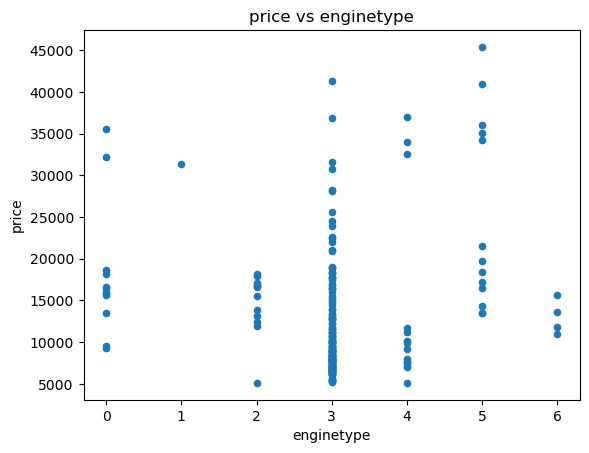

In [21]:
Final_combined.plot.scatter(x='enginetype', y='price', title='price vs enginetype')

* as Linearty Assumption of Regression failed we cannot process furthur 
* Hence linear Regression Fails

In [22]:
Final_combined=Final_combined.drop(['fitted_value','residual'], axis=1)

# Random Forest Regressor

In [23]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('price', axis = 1)
Y = Final_combined[['price']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5646)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict1=RF_Model.predict(X_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_train,y_predict1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13544\1094669321.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model.fit(X_train,y_train)


0.9899694673327885

In [25]:
r2_score(y_test,y_predict)

0.9402837424258808

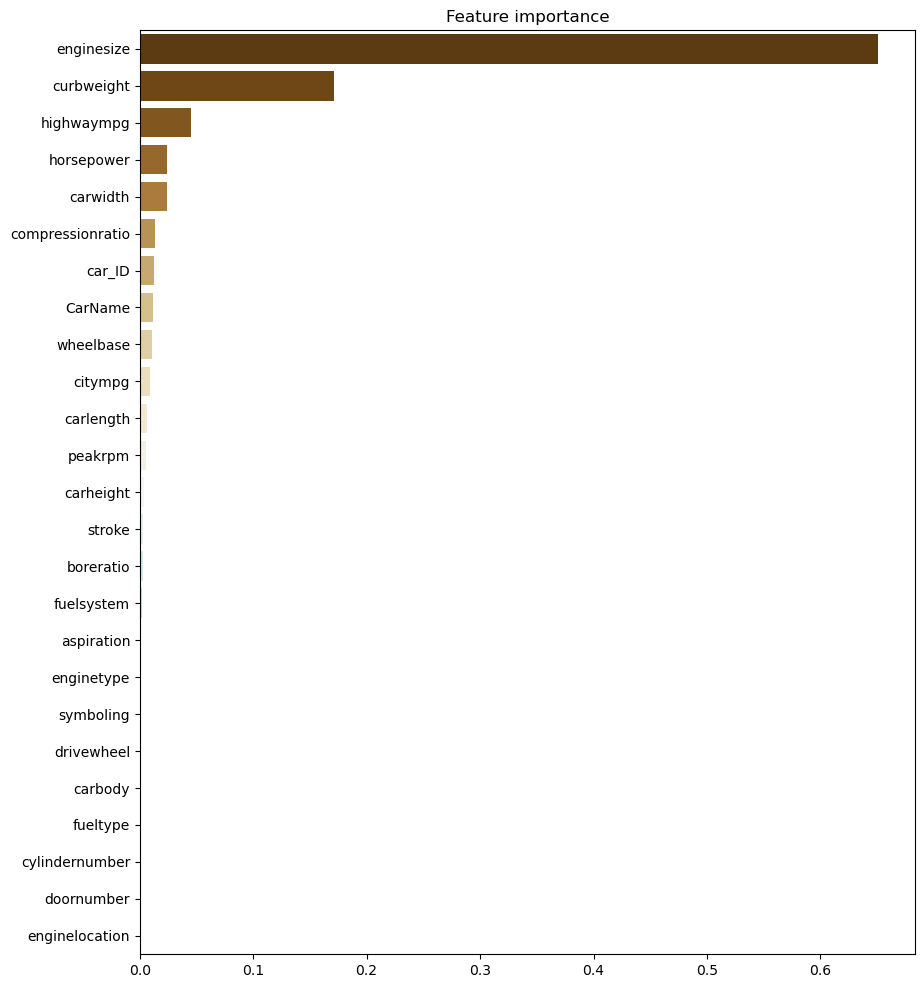

In [26]:
# Plot features importances
imp = pd.Series(data=RF_Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

# Conclusion
* Train Accuracy of Car Price model is 98%
* Test Accuracy of Car Price Model is 94%
* as outlier has no impact in case of Random forest Regressior we chose Random Forest Regressor 
* Engine Size is best independent variable as it has 86% strong positive correlation with price.
* linear Regression fails because of Assumption and it has many error.
* Important Feature graph show most important variable for Car price Prediction
* In Future we can apply this model on Car price Prediction

# Finish